In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from neuralprophet import NeuralProphet
df = pd.read_csv("./input/WIPRO.csv", parse_dates=["Date"])
df.head() 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [2]:
df.tail()



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5199,2020-11-23,WIPRO,EQ,346.30,348.00,357.4,346.00,356.60,355.85,352.34,10333347,3.640893e+14,106325.0,3349439.0,0.3241
5200,2020-11-24,WIPRO,EQ,355.85,359.00,361.4,355.00,356.00,355.50,357.97,10092441,3.612741e+14,107092.0,2538120.0,0.2515
5201,2020-11-25,WIPRO,EQ,355.50,357.90,358.8,349.55,350.10,350.00,352.95,6812338,2.404385e+14,86679.0,2608016.0,0.3828
5202,2020-11-26,WIPRO,EQ,350.00,351.00,356.4,347.20,355.85,354.85,352.19,7366370,2.594394e+14,60305.0,2925743.0,0.3972
5203,2020-11-27,WIPRO,EQ,354.85,354.85,357.5,347.85,350.95,350.50,351.80,12402084,4.363062e+14,84716.0,7497319.0,0.6045


In [3]:
 df = df[["", "VWAP"]]
 df.rename(columns={"Date": "ds", "VWAP": "y"}, inplace=True) 

KeyError: "[''] not in index"

In [37]:
model = NeuralProphet()
metrics = model.fit(df, validate_each_epoch=True, freq="D") 

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 15
 93%|█████████▎| 93/100 [00:00<00:00, 568.28it/s]
INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[15/15]: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s, SmoothL1Loss=0.0219, MAE=203, RegLoss=0, MAE_val=283, SmoothL1Loss_val=0.0146]


In [38]:
 future = model.make_future_dataframe(df, periods=365, n_historic_predictions=len(df))
 forecast = model.predict(future) 

Text(0.5, 1.0, 'Coal India Stocks')

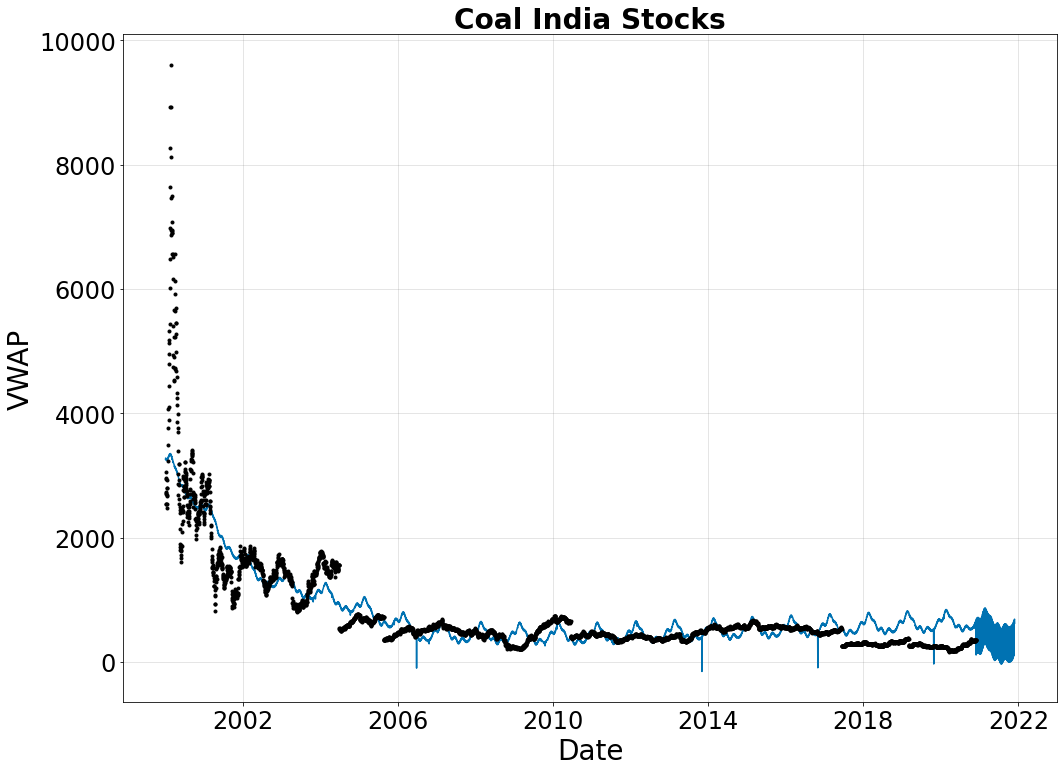

In [39]:
 fig, ax = plt.subplots(figsize=(14, 10))
 model.plot(forecast, xlabel="Date", ylabel="VWAP", ax=ax)
 ax.xaxis.label.set_size(28)
 ax.yaxis.label.set_size(28)
 ax.tick_params(axis='both', which='major', labelsize=24)
 ax.set_title("Coal India Stocks", fontsize=28, fontweight="bold") 

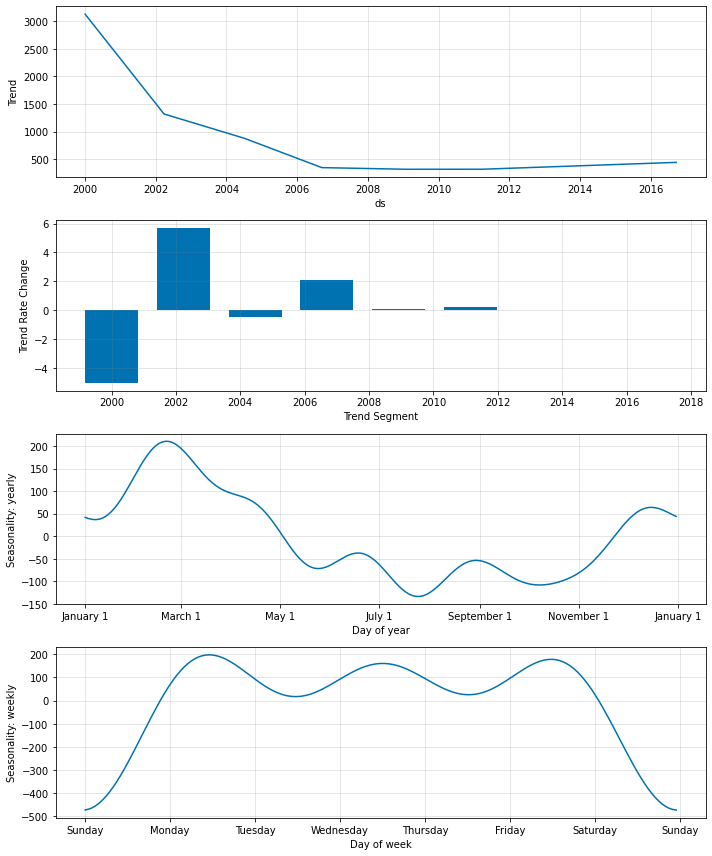

In [40]:
fig_param = model.plot_parameters()



Text(0.5, 1.0, 'Model Loss (MAE)')

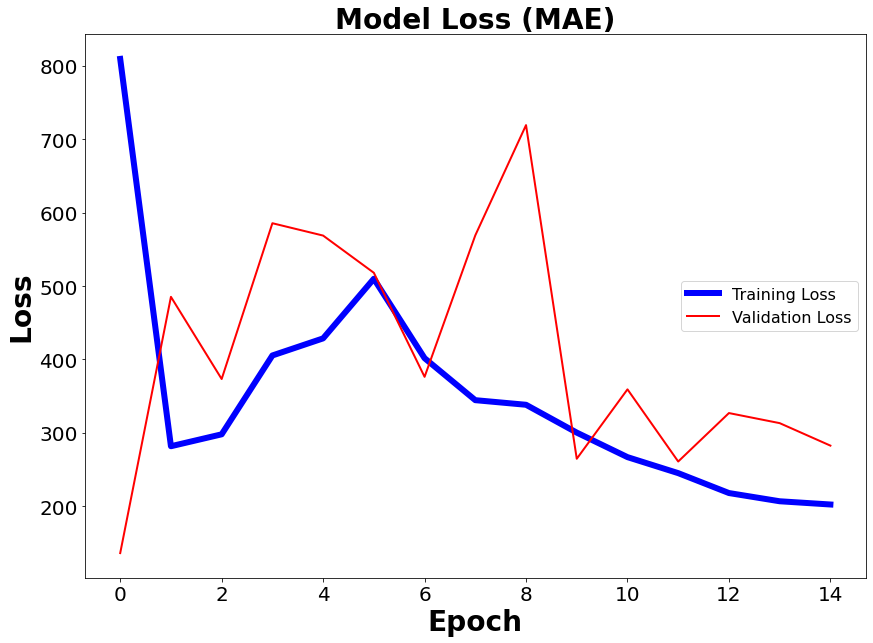

In [41]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], '-b', linewidth=6, label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28, fontweight="bold")
ax.set_ylabel("Loss", fontsize=28, fontweight="bold")
ax.set_title("Model Loss (MAE)", fontsize=28, fontweight="bold") 